In [324]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [325]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from xgboost import XGBClassifier


In [326]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [327]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EDA Process

In [328]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [329]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [330]:
df.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
69,LP001241,Female,No,0,Graduate,No,4300,0.0,136.0,360.0,0.0,Semiurban,N


# Checking null values

In [331]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# Imputing the missing values:


In [332]:
for i in [df]:
    i["Gender"]=i["Gender"].fillna(df.Gender.dropna().mode()[0])
    i['Married']=i['Married'].fillna(df.Married.dropna().mode()[0])
    i['Dependents']=i['Dependents'].fillna(df.Dependents.dropna().mode()[0])
    i['Self_Employed']=i['Self_Employed'].fillna(df.Self_Employed.dropna().mode()[0])
    i['Credit_History']=i['Credit_History'].fillna(df.Credit_History.dropna().mode()[0])
    

Fill null values with mode

Next, we will be using Iterative imputer for filling missing values of LoanAmount and Loan_Amount_Term

In [333]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [335]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [336]:
df['Gender']=df["Gender"].map({'Male':0,'Female':1}).astype(int)

In [337]:
df['Married']=df["Married"].map({'No':0,'Yes':1}).astype(int)

In [338]:
df['Dependents']=df["Dependents"].map({'0':0,'1':1,'2':2,'3+':3}).astype(int)

In [339]:
df['Education']=df["Education"].map({'Graduate':1,'Not Graduate':0}).astype(int)

In [340]:
df['Self_Employed']=df["Self_Employed"].map({'No':0,'Yes':1}).astype(int)

In [341]:
df['Property_Area']=df['Property_Area'].map({'Urban':0,'Rural':1,'Semiurban':2}).astype(int)

In [342]:
df['Loan_Status']=df["Loan_Status"].map({'N':0,'Y':1}).astype(int)

In [343]:
df['Property_Area'].unique()

array([0, 1, 2])

In [344]:
df.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [345]:
df['LoanAmount']=df['LoanAmount'].fillna(np.mean(df['LoanAmount']))

In [346]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(np.mean(df['Loan_Amount_Term']))

In [347]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

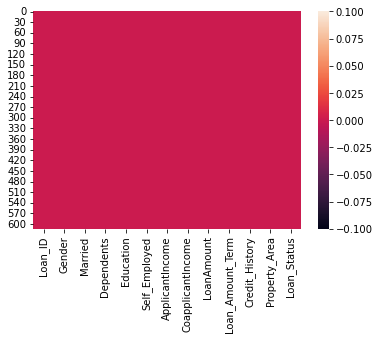

In [348]:
sns.heatmap(df.isnull())

Now there are no null values

As Loan_ID is completely unique and not correlated with any of the other column, So we will drop it using .drop() function.

In [349]:
# Dropping Loan_ID column
df.drop(['Loan_ID'],axis=1,inplace=True)

In [350]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,0,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,0,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,0,1,3,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,0,1
612,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,0,1


In [351]:
df['Credit_History'].unique()

array([1., 0.])

# Correlation :

In [352]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,-0.364569,-0.172914,0.045364,0.000525,-0.058809,-0.082912,-0.107930,0.073567,-0.009170,0.082045,-0.017987
Married,-0.364569,1.000000,0.334216,-0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.003071,0.091478
Dependents,-0.172914,0.334216,1.000000,-0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,0.001781,0.010118
Education,0.045364,-0.012304,-0.055752,1.000000,0.010383,0.140760,0.062290,0.166998,0.077242,0.073658,0.003592,0.085884
Self_Employed,0.000525,0.004489,0.056798,0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,0.021996,-0.003700
ApplicantIncome,-0.058809,0.051708,0.118202,0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.007894,-0.004710
CoapplicantIncome,-0.082912,0.075948,0.030430,0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,-0.028356,-0.059187
LoanAmount,-0.107930,0.147141,0.163106,0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,0.013799,-0.036416
Loan_Amount_Term,0.073567,-0.100863,-0.101054,0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,0.089508,-0.020974
Credit_History,-0.009170,0.010938,-0.040160,0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.030248,0.540556


In [353]:
df.corr()['Loan_Status'].sort_values()

CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.020974
Gender              -0.017987
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Education            0.085884
Married              0.091478
Property_Area        0.103253
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

<AxesSubplot:>

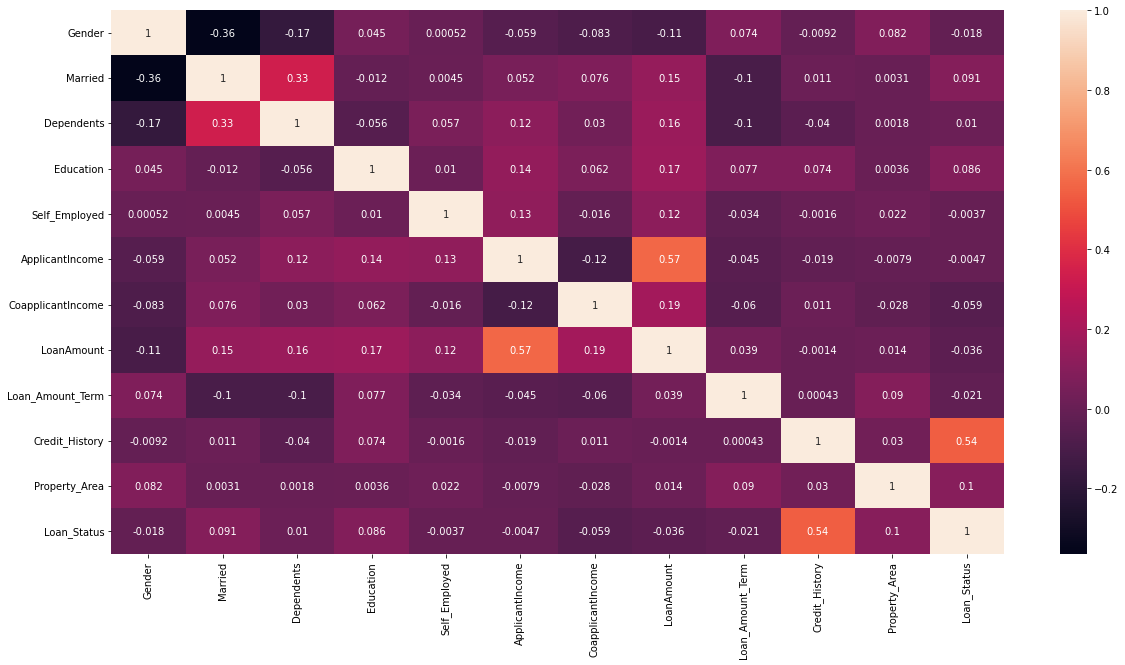

In [354]:
plt.figure(figsize=(20,10))

sns.heatmap(df.corr(),annot=True)

Outcome of Correlation :
some columns is positive correlated with target variable, some columns is negitive correlated with target variable

Max correlation - Credit_History

min correlation - Dependents


The above heatmap is showing the correlation between Loan Amount and ApplicantIncome. It also shows that Credit_History has a high impact on Loan_Status.

In [355]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

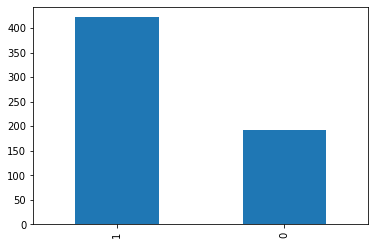

In [356]:
df['Loan_Status'].value_counts().plot(kind='bar')


Target Variable data is imbalanced

Describing datasest:

In [357]:
round(df.describe()[1:].transpose(),2)

,mean,std,min,25%,50%,75%,max
Gender,0.18,0.39,0.0,0.00,0.0,0.00,1.0
Married,0.65,0.48,0.0,0.00,1.0,1.00,1.0
Dependents,0.74,1.01,0.0,0.00,0.0,1.00,3.0
Education,0.78,0.41,0.0,1.00,1.0,1.00,1.0
Self_Employed,0.13,0.34,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,5403.46,6109.04,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,1621.25,2926.25,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,146.41,84.04,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,342.00,64.37,12.0,360.00,360.0,360.00,480.0
Credit_History,0.86,0.35,0.0,1.00,1.0,1.00,1.0


In [358]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,614.0,0.182410,0.386497,0.0,0.00,0.0,0.00,1.0
Married,614.0,0.653094,0.476373,0.0,0.00,1.0,1.00,1.0
Dependents,614.0,0.744300,1.009623,0.0,0.00,0.0,1.00,3.0
Education,614.0,0.781759,0.413389,0.0,1.00,1.0,1.00,1.0
Self_Employed,614.0,0.133550,0.340446,0.0,0.00,0.0,0.00,1.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,146.412162,84.037468,9.0,100.25,129.0,164.75,700.0
Loan_Amount_Term,614.0,342.000000,64.372489,12.0,360.00,360.0,360.00,480.0
Credit_History,614.0,0.855049,0.352339,0.0,1.00,1.0,1.00,1.0


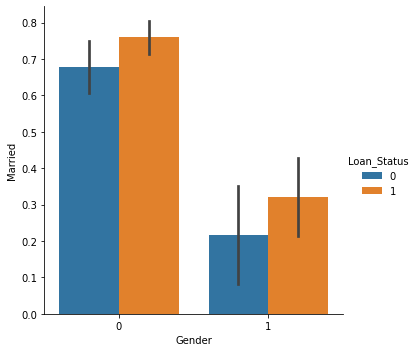

In [359]:
sns.catplot(x="Gender", y="Married",
            hue="Loan_Status", 
            kind="bar", 
            data=df)

# Splitting Dataset 

In [360]:
x = df.drop(['Loan_Status'],axis=1)
y = df['Loan_Status']

# Model Building And Saving.

In [366]:
x.shape

(614, 11)

In [367]:
y.shape

(614,)

In [369]:
x_train, x_test, y_train, y_test  = train_test_split(x,y, test_size=0.30, random_state=11)

In [370]:
lr=LogisticRegression() #Logistic Regression
knn=KNeighborsClassifier() #KNearest Neibour 
dt=DecisionTreeClassifier() # Deciesion Tree
rf=RandomForestClassifier() # Random Forest
adb=AdaBoostClassifier()    # Adaboost Classifier 
svm=SVC()              # support vactor classifier        
gdboost=GradientBoostingClassifier() #Gradient Boosting Classifier
xgboost=XGBClassifier()  #Xtrim Gredient Boosting Classifier 

print("Model is created")

Model is created


We are using almost 8 models. Now its time to train out model.

In [373]:
lr.fit(x_train, y_train)
knn.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
adb.fit(x_train,y_train)
svm.fit(x_train,y_train)
gdboost.fit(x_train,y_train)
xgboost.fit(x_train,y_train)

print("Model is trained")

Model is trained


Our Model has been train now checking the accuracy:

In [374]:
print("Lr classification score",lr.score(x_train,y_train))
print("knn classification score",knn.score(x_train,y_train))
print("dt classification score",dt.score(x_train,y_train))
print("rf classification score",rf.score(x_train,y_train))
print("adb classification score",adb.score(x_train,y_train))
print("svm classification score",svm.score(x_train,y_train))
print("gdboost classification score",gdboost.score(x_train,y_train))
print("xgboost classification score",xgboost.score(x_train,y_train))

Lr classification score 0.8135198135198135
knn classification score 0.7412587412587412
dt classification score 1.0
rf classification score 1.0
adb classification score 0.8508158508158508
svm classification score 0.7062937062937062
gdboost classification score 0.9044289044289044
xgboost classification score 1.0


Using confusion matrix in order to evaluate the models accuracy.

In [375]:
lr_yprad = lr.predict(x_test)
knn_yprad = knn.predict(x_test)
dt_yprad = dt.predict(x_test)
rf_yprad = rf.predict(x_test)
adb_yprad = adb.predict(x_test)
svm_yprad = svm.predict(x_test)
gdboost_yprad = gdboost.predict(x_test)
xgboost_yprad = xgboost.predict(x_test)

In [376]:
lr_conf_mat = confusion_matrix(y_test,lr_yprad)
print("confusion matrix for lr_model",'\n',lr_conf_mat)

confusion matrix for lr_model 
 [[ 33  31]
 [  5 116]]


In [377]:
knn_conf_mat = confusion_matrix(y_test,knn_yprad)
print("confusion matrix for knn_model",'\n',knn_conf_mat)

confusion matrix for knn_model 
 [[ 11  53]
 [ 17 104]]


In [378]:
dt_conf_mat = confusion_matrix(y_test,dt_yprad)
print("confusion matrix for dt_model",'\n',dt_conf_mat)

confusion matrix for dt_model 
 [[ 39  25]
 [ 21 100]]


In [379]:
rf_conf_mat = confusion_matrix(y_test,rf_yprad)
print("confusion matrix for lr_model",'\n',rf_conf_mat)

confusion matrix for lr_model 
 [[ 34  30]
 [ 11 110]]


In [380]:
adb_conf_mat = confusion_matrix(y_test,adb_yprad)
print("confusion matrix for lr_model",'\n',adb_conf_mat)

confusion matrix for lr_model 
 [[ 32  32]
 [ 10 111]]


In [381]:
svm_conf_mat = confusion_matrix(y_test,svm_yprad)
print("confusion matrix for svm_model",'\n',svm_conf_mat)

confusion matrix for svm_model 
 [[  0  64]
 [  0 121]]


In [382]:
gdboost_conf_mat = confusion_matrix(y_test,gdboost_yprad)
print("confusion matrix for gdboost_model",'\n',gdboost_conf_mat)

confusion matrix for gdboost_model 
 [[ 33  31]
 [ 13 108]]


In [383]:
xgboost_conf_mat = confusion_matrix(y_test,xgboost_yprad)
print("confusion matrix for xgboost_model",'\n',xgboost_conf_mat)

confusion matrix for xgboost_model 
 [[ 36  28]
 [ 15 106]]


Checking classification report for each model:

In [384]:
lr_report = classification_report(y_test,lr_yprad)
print(" lr classification_report" ,'\n',lr_report)

knn_report = classification_report(y_test,knn_yprad)
print(" knn classification_report" ,'\n',knn_report)

dt_report = classification_report(y_test,dt_yprad)
print(" dt classification_report" ,'\n',dt_report)


rf_report = classification_report(y_test,rf_yprad)
print(" rf classification_report" ,'\n',rf_report)


adb_report = classification_report(y_test,adb_yprad)
print(" adb classification_report" ,'\n',adb_report)


svm_report = classification_report(y_test,svm_yprad)
print(" svm classification_report" ,'\n',svm_report)


gdboost_report = classification_report(y_test,gdboost_yprad)
print(" gdboost classification_report" ,'\n',gdboost_report)

xgboost_report = classification_report(y_test,xgboost_yprad)
print(" xgboost classification_report" ,'\n',xgboost_report)


 lr classification_report 
               precision    recall  f1-score   support

           0       0.87      0.52      0.65        64
           1       0.79      0.96      0.87       121

    accuracy                           0.81       185
   macro avg       0.83      0.74      0.76       185
weighted avg       0.82      0.81      0.79       185

 knn classification_report 
               precision    recall  f1-score   support

           0       0.39      0.17      0.24        64
           1       0.66      0.86      0.75       121

    accuracy                           0.62       185
   macro avg       0.53      0.52      0.49       185
weighted avg       0.57      0.62      0.57       185

 dt classification_report 
               precision    recall  f1-score   support

           0       0.65      0.61      0.63        64
           1       0.80      0.83      0.81       121

    accuracy                           0.75       185
   macro avg       0.73      0.72      0.72

# ROC AUC Curve:

In [385]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import plot_roc_curve
#importing the ric and auc from sklearn and predect the x_test and 
print(roc_auc_score(y_test,lr.predict(x_test)))
print(roc_auc_score(y_test,knn.predict(x_test)))
print(roc_auc_score(y_test,dt.predict(x_test)))
print(roc_auc_score(y_test,rf.predict(x_test)))
print(roc_auc_score(y_test,adb.predict(x_test)))
print(roc_auc_score(y_test,svm.predict(x_test)))
print(roc_auc_score(y_test,gdboost.predict(x_test)))
print(roc_auc_score(y_test,xgboost.predict(x_test)))


0.7371513429752067
0.5156895661157025
0.7179106404958677
0.7201704545454546
0.7086776859504132
0.5
0.7040934917355373
0.7192665289256198


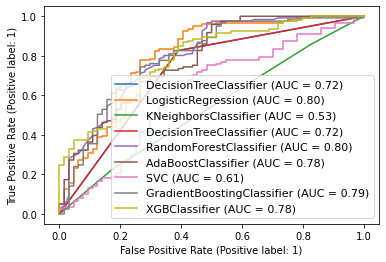

In [387]:
#lets find roc curve to check best fittted model

disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)  # here ax_ for axis with confustion matrics
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dt,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(adb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gdboost,x_test,y_test,ax=disp.ax_)
plot_roc_curve(xgboost,x_test,y_test,ax=disp.ax_)

plt.legend(prop = {'size':11}, loc ='lower right')

As per above also we can see our LogisticRegression and RandomForestClassifier classifier giving the best scores.

# K-Fold Cross Validation :

In [388]:
from sklearn.model_selection import KFold,cross_val_score
k_f = KFold(n_splits=4,shuffle=True)
k_f

KFold(n_splits=4, random_state=None, shuffle=True)

In [393]:
print("Mean of Cross validation score for rf  model","=>",cross_val_score(rf,x,y,cv=5).mean())
print("Cross validation score for lr model","=>",cross_val_score(lr,x,y,cv=5).mean())

Mean of Cross validation score for rf  model => 0.7785285885645742
Cross validation score for lr model => 0.8045581767293083


As per above we can see our ‘rf’ model giving the less cross validation score. so we will consider this model is best for our prediction. Now will try hyperparameter tuning to check chances of accuracy increas

HyperParameter Tuning !

In [404]:

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor

In [406]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='r2', verbose=1)

In [407]:
grid_search.best_params_

{'max_features': 0.20000000000000004, 'n_estimators': 60}

In [408]:
grid_search.best_score_

0.22773297211186733

In [409]:
random_search = RandomizedSearchCV(RandomForestRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1, 
                             n_iter=50, random_state = 0
                           )
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
                   random_state=0, scoring='r2', verbose=1)

In [411]:
random_search.best_params_

{'n_estimators': 85, 'max_features': 0.30000000000000004}

In [412]:
random_search.best_score_

0.22654599652665533

I think that, among the two algorithms, random search is very useful because it’s faster and, since it doesn’t reach the best point in the grid, it avoids overfitting and is more able to generalize. However, for small grids (i.e. less than 200 points) I suggest using grid search if the training phase is not too slow. For the general-purpose cases, the random search may increase training speed and reach a reasonably good solution for our model.